<a href="https://colab.research.google.com/github/AbhiSrvstv/AbhiSrvstv/blob/main/Yes_bank_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df= pd.read_csv('/content/drive/MyDrive/Yes bank stock/data_YesBank_StockPrices.csv')

In [40]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [42]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [43]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

##Exploratory Data Analysis

## Data Cleaning


In [44]:
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x , '%b-%y'))

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [46]:
df.set_index('Date',inplace =True)
df.index.freq ='MS'


In [47]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


##DATA VISUALIZATION

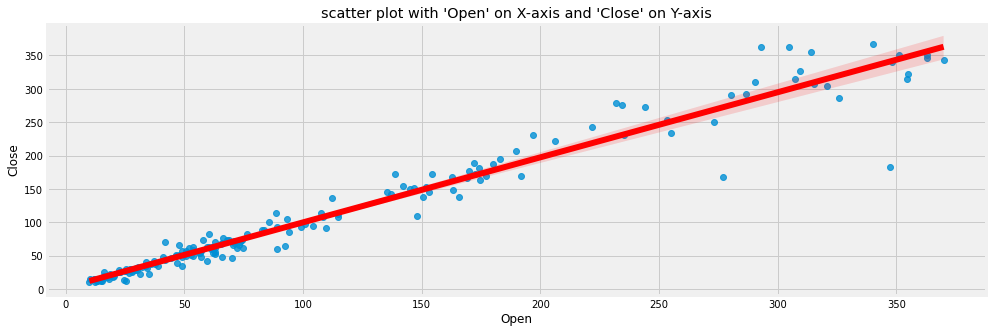

In [61]:
# Create scatter plot with 'Open' on X-axis and 'Close' on Y-axis
plt.figure(figsize=(15,5))
plt.title("scatter plot with 'Open' on X-axis and 'Close' on Y-axis")
sns.regplot(x = 'Open' , y = 'Close' , data=df ,line_kws={"color": "red"} )
plt.show()


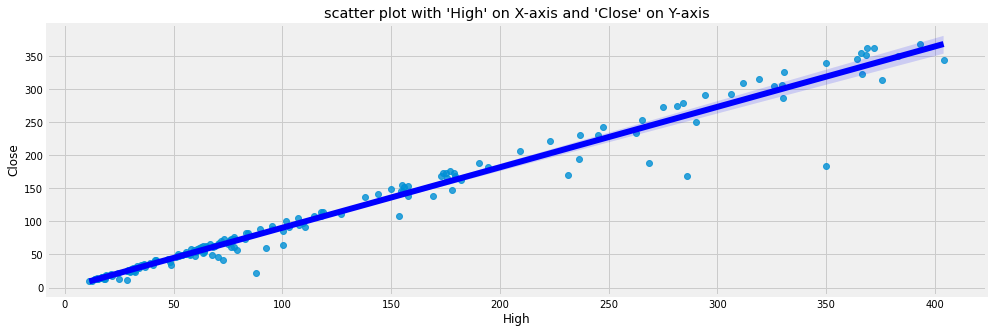

In [62]:
# Create scatter plot with 'High' on X-axis and 'Close' on Y-axis
plt.figure(figsize=(15,5))
plt.title("scatter plot with 'High' on X-axis and 'Close' on Y-axis")
sns.regplot(x = 'High' , y = 'Close' , data=df ,line_kws={"color": "Blue"} )
plt.show()


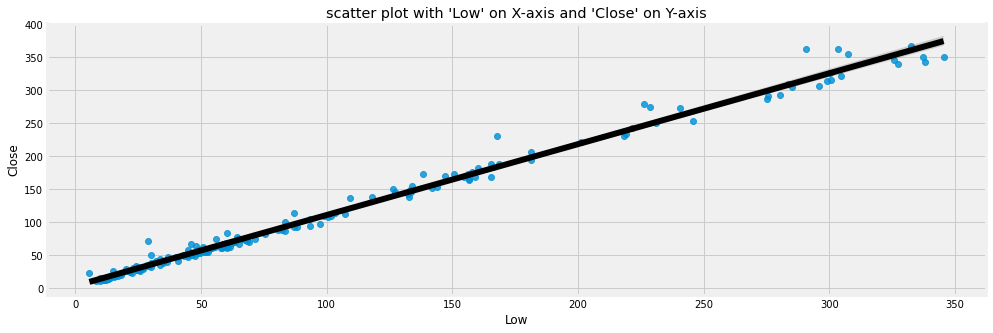

In [140]:
# Create scatter plot with 'Low' on X-axis and 'Close' on Y-axis
plt.figure(figsize=(15,5))
plt.title("scatter plot with 'Low' on X-axis and 'Close' on Y-axis")
sns.regplot(x = 'Low' , y = 'Close' , data=df ,line_kws={"color": "Black"} )
plt.show()


## Model Building and Evaluation
Build a multiple linear regression model using the statsmodels.api module.

In [65]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#feature variable
X  = df.drop(columns= ['Close'])
y  = df['Close']
X_train,X_test ,y_train,y_test =train_test_split(X,y,test_size=0.30, random_state=42)

In [66]:
#adding constant
X_train_sm =sm.add_constant(X_train)
model =sm.OLS(y_train,X_train_sm).fit()
model.params

const    0.505250
Open    -0.632982
High     0.699617
Low      0.956406
dtype: float64

In [67]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.427e+04
Date:                Thu, 05 May 2022   Prob (F-statistic):          2.93e-158
Time:                        08:02:07   Log-Likelihood:                -400.93
No. Observations:                 129   AIC:                             809.9
Df Residuals:                     125   BIC:                             821.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5053      0.722      0.699      0.4

In [85]:
y_train_pred =model.predict(X_train_sm)

In [86]:
X_test_sm = sm.add_constant(X_train)
y_test_pred = model.predict(X_test_sm)

In [87]:
print(y_test_pred)

Date
2018-06-01    338.242967
2012-08-01     69.039550
2018-01-01    351.760130
2007-09-01     39.801868
2018-09-01    184.506742
                 ...    
2014-05-01    109.759604
2006-09-01     18.387966
2013-03-01     90.854982
2020-06-01     29.728938
2014-01-01     64.761426
Length: 129, dtype: float64


In [90]:
print(y_train_pred)

Date
2018-06-01    338.242967
2012-08-01     69.039550
2018-01-01    351.760130
2007-09-01     39.801868
2018-09-01    184.506742
                 ...    
2014-05-01    109.759604
2006-09-01     18.387966
2013-03-01     90.854982
2020-06-01     29.728938
2014-01-01     64.761426
Length: 129, dtype: float64


In [100]:
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
x = X.apply(zscore) # feature variable 
y = np.log(df['Close']) # target variable
x_train ,x_test , y_train ,y_test = train_test_split(x,y , test_size = 0.20 , random_state =42)
model_l = LinearRegression()
model_l.fit(x_train,y_train)
print(model_l.intercept_)
print(model_l.coef_)

4.208450173668592
[-0.39890719  0.80984715  0.4861705 ]


In [101]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score , mean_squared_error ,mean_absolute_error
y_train_pred = model_l.predict(x_train)
y_test_pred = model_l.predict(x_test)
print('Training set accuracy ')
print(f'r2_score : ' , {r2_score(y_train , y_train_pred )})
print(f'mean_squared_error : ' , {mean_squared_error(y_train , y_train_pred )})
print(f'mean_absolute_error : ' , {mean_absolute_error(y_train , y_train_pred )})
print()
print('-------------------------------')
print('Testing set accuracy ')
print(f'r2_score : ' , {r2_score(y_test , y_test_pred )})
print(f'mean_squared_error : ' , {mean_squared_error(y_test , y_test_pred )})
print(f'mean_absolute_error : ' , {mean_absolute_error(y_test , y_test_pred )})

Training set accuracy 
r2_score :  {0.8166509438922308}
mean_squared_error :  {0.1823322821486136}
mean_absolute_error :  {0.3664531441611467}

-------------------------------
Testing set accuracy 
r2_score :  {0.8142697801007034}
mean_squared_error :  {0.15248874309135949}
mean_absolute_error :  {0.32969977996003974}


In [102]:
print(y_test_pred)

[3.51132637 3.38090819 6.64652459 4.42376987 6.06552116 3.44901735
 3.5963283  3.80100634 4.72821494 3.88455009 3.72314953 5.14950115
 3.83511375 3.57352206 3.38753658 3.48086266 3.67102043 3.48195975
 3.81010984 3.69829728 5.18752755 4.60355216 6.59463697 3.62499585
 3.41328666 4.47527395 3.77342038 3.53563515 3.77351049 4.56638181
 3.77559383 3.6745845  4.74452959 5.55736758 3.73573042 3.70648437
 3.80023264]


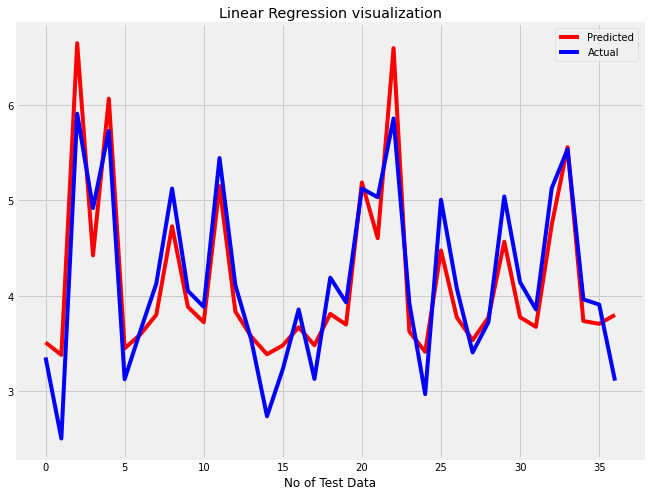

In [107]:
#Linear Regression visualization
plt.figure(figsize=(10,8))
plt.plot(y_test_pred,color='red')
plt.title('Linear Regression visualization')
plt.plot(np.array(y_test),color='blue')
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

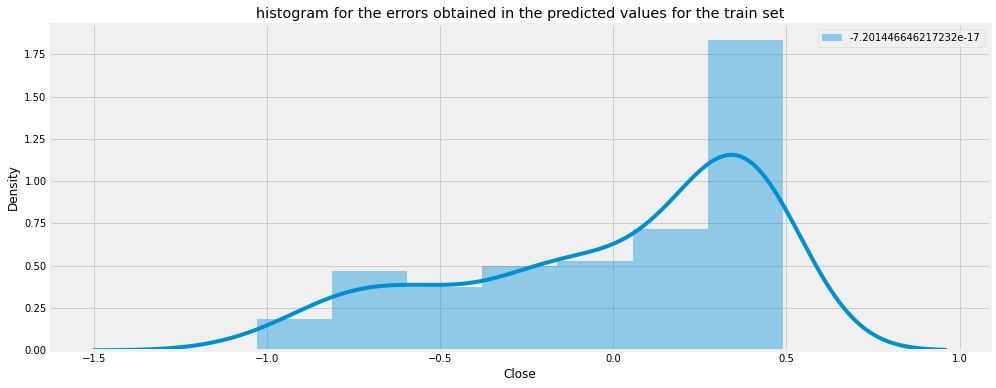

In [108]:
# Create a histogram for the errors obtained in the predicted values for the train set.
errors = y_train - y_train_pred
plt.figure(figsize=(15,6))
plt.title('histogram for the errors obtained in the predicted values for the train set')
sns.distplot(errors,label =errors.mean())
plt.legend()
plt.show()

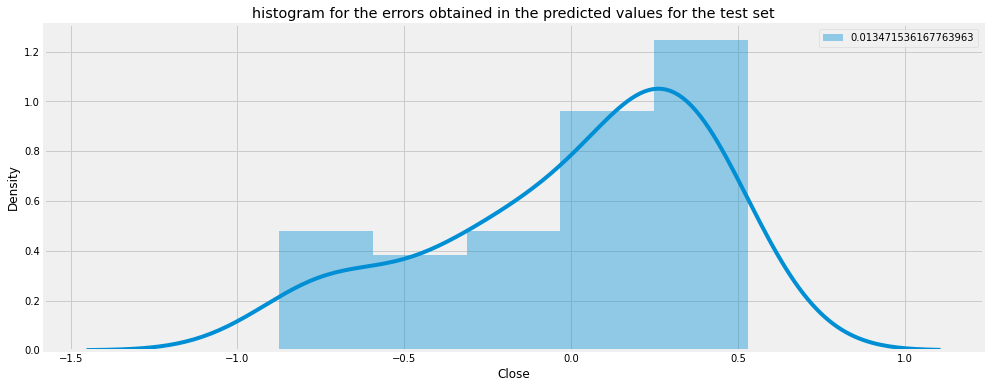

In [109]:
# Create a histogram for the errors obtained in the predicted values for the test set.
errors_test = y_test - y_test_pred
plt.figure(figsize=(15,6))
plt.title('histogram for the errors obtained in the predicted values for the test set')
sns.distplot(errors_test,label =errors_test.mean())
plt.legend()
plt.show()

##Verify Homoscedasticity
Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

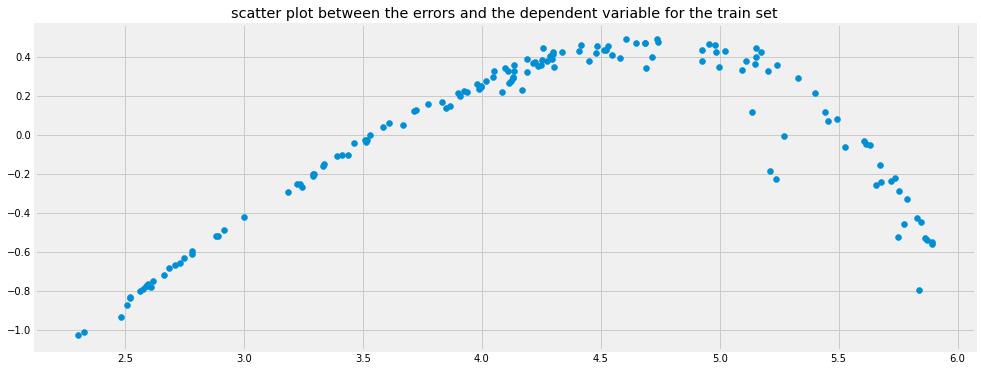

In [114]:
# Create a scatter plot between the errors and the dependent variable for the train set.

plt.figure(figsize=(15,6))
plt.title('scatter plot between the errors and the dependent variable for the train set')
plt.scatter(y_train , errors )
plt.show()

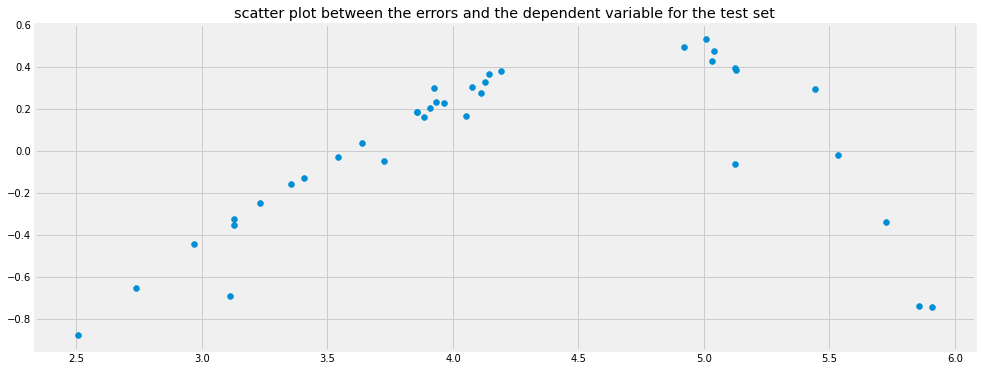

In [116]:
# Create a scatter plot between the errors and the dependent variable for the test set.

plt.figure(figsize=(15,6))
plt.title('scatter plot between the errors and the dependent variable for the test set')
plt.scatter(y_test , errors_test)
plt.show()

##KNN

In [121]:
#Applying the KNN regrssor model 
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors =3)
#fitting the model
knn_model=knn_regressor.fit(x_train,y_train)


In [123]:
from sklearn.metrics import r2_score , mean_squared_error ,mean_absolute_error
y_knn_train_pred = knn_model.predict(x_train)
y_knn_test_pred = knn_model.predict(x_test)
print('Training set accuracy ')
print(f'r2_score : ' , {r2_score(y_train , y_knn_train_pred )})
print(f'mean_squared_error : ' , {mean_squared_error(y_train ,y_knn_train_pred )})
print(f'mean_absolute_error : ' , {mean_absolute_error(y_train , y_knn_train_pred )})
print()
print('-------------------------------')
print('Testing set accuracy ')
print(f'r2_score : ' , {r2_score(y_test , y_knn_test_pred )})
print(f'mean_squared_error : ' , {mean_squared_error(y_test , y_knn_test_pred )})
print(f'mean_absolute_error : ' , {mean_absolute_error(y_test , y_knn_test_pred )})

Training set accuracy 
r2_score :  {0.9963167597390379}
mean_squared_error :  {0.0036628146156810894}
mean_absolute_error :  {0.04322106008911362}

-------------------------------
Testing set accuracy 
r2_score :  {0.9611844039182387}
mean_squared_error :  {0.031868488940889325}
mean_absolute_error :  {0.11434257288015699}


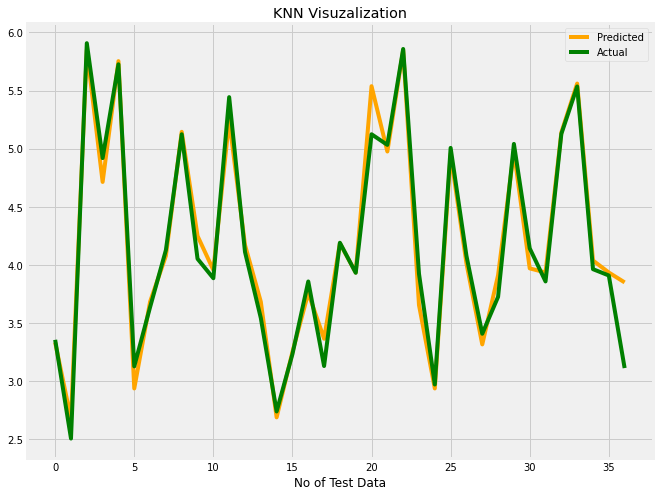

In [126]:
# KNN Visuzalization
plt.figure(figsize=(10,8))
plt.plot(y_knn_test_pred,color='orange')
plt.plot(np.array(y_test),color='green')
plt.title('KNN Visuzalization')
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##Support Vector Machine

In [129]:
#importing SVm model
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')#Linear
#Fitting the model
svm_model=svm_regressor.fit(x_train,y_train)


In [130]:
from sklearn.metrics import r2_score , mean_squared_error ,mean_absolute_error
y_svm_train_pred = svm_model.predict(x_train)
y_svm_test_pred = svm_model.predict(x_test)
print('Training set accuracy ')
print(f'r2_score : ' , {r2_score(y_train , y_svm_train_pred )})
print(f'mean_squared_error : ' , {mean_squared_error(y_train ,y_svm_train_pred )})
print(f'mean_absolute_error : ' , {mean_absolute_error(y_train , y_svm_train_pred )})
print()
print('-------------------------------')
print('Testing set accuracy ')
print(f'r2_score : ' , {r2_score(y_test , y_svm_test_pred )})
print(f'mean_squared_error : ' , {mean_squared_error(y_test ,y_svm_test_pred )})
print(f'mean_absolute_error : ' , {mean_absolute_error(y_test , y_svm_test_pred )})

Training set accuracy 
r2_score :  {0.7905362496672801}
mean_squared_error :  {0.2083021556605325}
mean_absolute_error :  {0.3469097175439565}

-------------------------------
Testing set accuracy 
r2_score :  {0.8040263331485495}
mean_squared_error :  {0.16089884647412558}
mean_absolute_error :  {0.30580014822695184}


## SVM Visualization

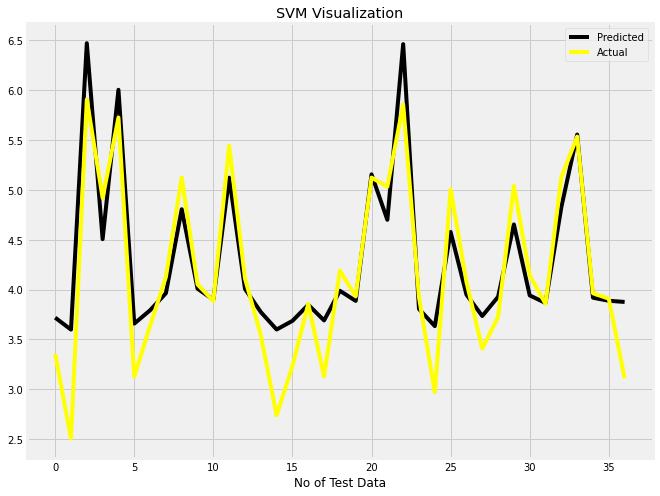

In [136]:
#SVM Visualization
plt.figure(figsize=(10,8))
plt.plot(y_svm_test_pred,color='black')
plt.plot(np.array(y_test),color='yellow')
plt.title('SVM Visualization')
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## All Models Visualization


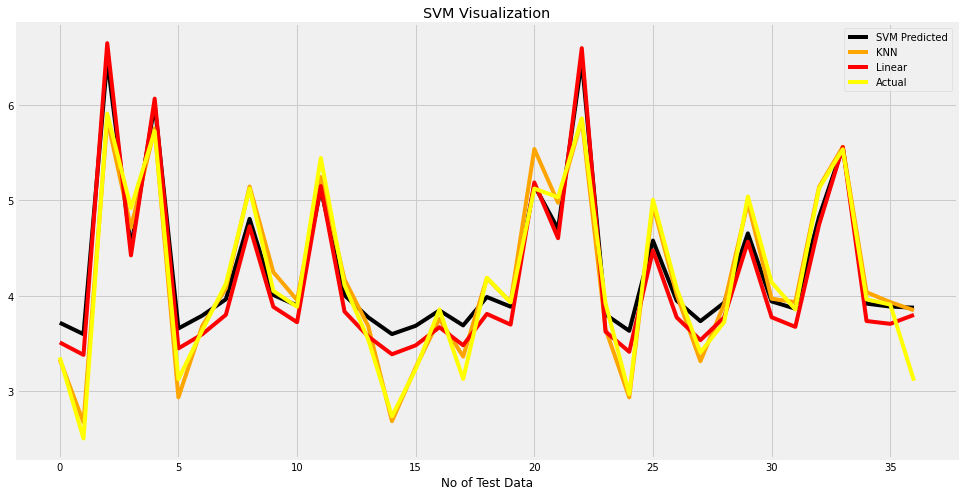

In [135]:
plt.figure(figsize=(15,8))
plt.plot(y_svm_test_pred,color='black')
plt.plot(y_knn_test_pred,color='orange')
plt.plot(y_test_pred,color='red')
plt.plot(np.array(y_test),color='yellow')
plt.title('SVM Visualization')
plt.legend(["SVM Predicted","KNN ","Linear","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## Evaluation


In [139]:
#Comparison between algorithms 
accuracy_list = ['MSE','RMSE',"R2","Adjusted_R2"]
reg_models = [model_l,knn_model,svm_model]

def error_matrix(y):
  MSE = mean_squared_error(y_test,y)
  RMSE = np.sqrt(MSE)
  r_2 = r2_score(y_test,y)
  adj_r2 = 1-(1-r2_score(y_test,y))*(x_test.shape[0]-1)/((x_test.shape[0]-x_test.shape[1]-1))

  return MSE,RMSE,r_2,adj_r2

def training_accuracy(models):
  train_accuracy = []
  for model in reg_models:
    model.fit(x_train,y_train)
    train_accuracy.append(model.score(x_train,y_train))
  return train_accuracy



accuracy_df = pd.DataFrame(index = accuracy_list)
accuracy_df['Linear Regression'] = error_matrix(y_test_pred)
accuracy_df['KNN'] = error_matrix(y_knn_test_pred)
accuracy_df['SVM'] = error_matrix(y_svm_test_pred)
accuracy_df.loc['Training Accuracy'] = training_accuracy(reg_models)
accuracy_df

,Linear Regression,KNN,SVM
MSE,0.152489,0.031868,0.160899
RMSE,0.390498,0.178517,0.401122
R2,0.814270,0.961184,0.804026
Adjusted_R2,0.797385,0.957656,0.786211
Training Accuracy,0.816651,0.996317,0.790536
